In [1]:
import pandas as pd
import numpy as np

In [2]:
rawdata=pd.read_csv('data/billboard_lyrics_1964-2015.csv', encoding='latin')

In [3]:
rawdata = pd.DataFrame(rawdata)

In [4]:
rawdata.head()

,Rank,Song,Artist,Year,Lyrics,Source
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,3.0
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,1.0
2,3,i cant get no satisfaction,the rolling stones,1965,,1.0
3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,1.0
4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,1.0


In [5]:
rawdata['Lyrics'][1]

' sugar pie honey bunch you know that i love you i cant help myself i love you and nobody elsein and out my life you come and you go leaving just your picture behind and i kissed it a thousand timeswhen you snap your finger or wink your eye i come arunning to you im tied to your apron strings and theres nothing that i can docant help myself no i cant help myselfsugar pie honey bunch im weaker than a man should be i cant help myself im a fool in love you seewanna tell you i dont love you tell you that were through and ive tried but every time i see your face i get all choked up insidewhen i call your name girl it starts the flame burning in my heart tearing it all apart no matter how i try my love i cannot hidecause sugar pie honey bunch you know that im weak for you cant help myself i love you and nobody elsesugar pie honey bunch do anything you ask me to cant help myself i want you and nobody elsesugar pie honey bunch you know that i love you i cant help myself i cant help myself '

# things to be sorted out

- wordcloud of lyrics
- career span of top 20 most-charted artist
- songs featuring 2+ artists
- most characteristic lyrics by decade
- song frequency by career span
- words per a song
- popular genre per year

## 1. wordcloud of lyrics

- love이 가장 많이 나올 것이다
- 감탄사가 가장 많이 나올 것이다

In [6]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [7]:
# 시각화 준비
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
mask = np.array( Image.open('./data/play.png') )
mask.shape

(980, 980, 4)

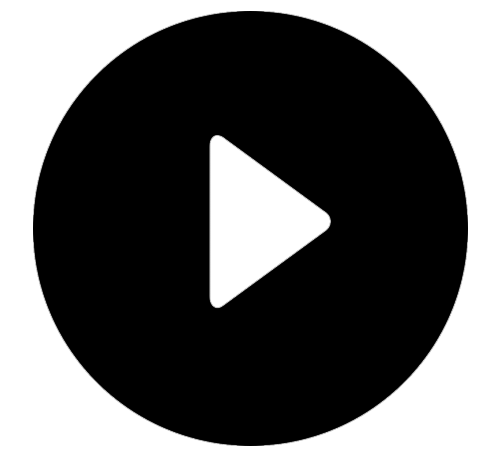

In [9]:
plt.figure(figsize=(8,8))
# interpolation='bilinear' <= 이미지를 그리는 처리에 중요한 부분
# 이중선형 보간법 설정, 1차원 선형보간법을 2차원으로 확장한다는 의미
plt.imshow( mask, cmap=plt.cm.gray_r, interpolation='bilinear')
# 축제거
plt.axis('off')
plt.show()

In [10]:
stopwords= set( STOPWORDS )
len(stopwords)
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 'ours',
 '

In [11]:
# 워드 카운트 수행 위해 가사를 하나의 문자열로 만들어주기
lyrics=[lyric for lyric in rawdata['Lyrics']]

In [12]:
lyrics=' '.join(map(str,lyrics))

In [13]:
len(lyrics)

7710569

In [14]:
# 워드클라우드 생성
# 워드 카운트 기능 제공
wc=WordCloud(background_color='white', 
          max_words=2000, 
          mask=mask, 
          stopwords=stopwords)

In [15]:
# 워드 카운트 수행
wc = wc.generate(lyrics)

In [16]:
len(wc.words_), type(wc.words_)

(2000, dict)

In [17]:
# 최대 빈도 word를 1.0으로 두고, 나머지는 0까지 정규화 하였다
wc.words_

{'love': 1.0,
 'got': 0.8247978436657682,
 'oh oh': 0.8229110512129381,
 'now': 0.7973045822102426,
 'girl': 0.6765498652291105,
 'see': 0.6326145552560647,
 'want': 0.6029649595687332,
 'cause': 0.5773584905660377,
 'time': 0.5121293800539084,
 'one': 0.5064690026954178,
 'thing': 0.469811320754717,
 'im': 0.4679245283018868,
 'yeah yeah': 0.46388140161725067,
 'say': 0.45498652291105124,
 'right': 0.4517520215633423,
 'dont know': 0.444743935309973,
 'way': 0.42479784366576817,
 'la la': 0.4199460916442049,
 'come': 0.41347708894878704,
 'know': 0.4123989218328841,
 'make': 0.4086253369272237,
 'baby': 0.40808625336927223,
 'said': 0.40619946091644205,
 'thats': 0.39460916442048516,
 'ill': 0.38652291105121295,
 'man': 0.384366576819407,
 'feel': 0.37951482479784365,
 'life': 0.37035040431266847,
 'na na': 0.3681940700808625,
 'heart': 0.34097035040431267,
 'go': 0.32587601078167117,
 'well': 0.31725067385444744,
 'tell': 0.3169811320754717,
 'world': 0.30566037735849055,
 'boy': 0.3

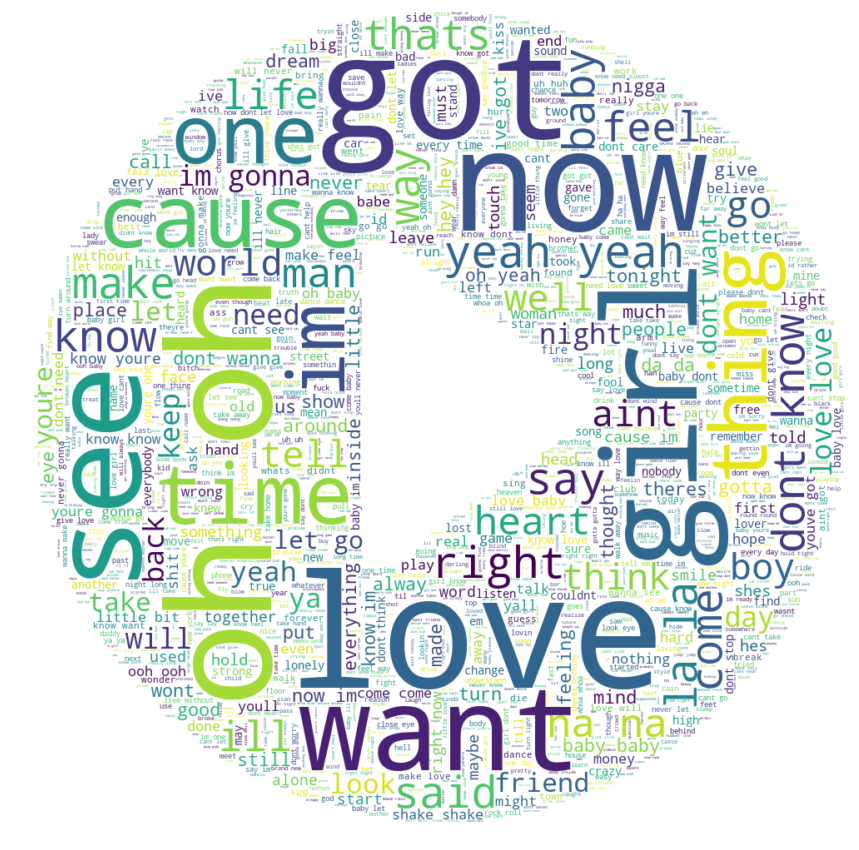

In [18]:
# 최종 시각화
plt.figure(figsize=(15,15))
plt.imshow( wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [19]:
# 1차 제거할 단어
st_words={'see','oh oh', 'im','now','aint','got','let go','one','thought','dont want', 'yeah yeah','youre','la la','said', 'cause','right','la','well','thats','alway','na','yall','yeah',
          'always','oh','never','cant','gonna','let','wont','around','still','know', 'dont know','dont','cause','say','youve'}

In [20]:
for n in st_words:
    stopwords.add(n)

In [21]:
len(stopwords)

227

In [22]:
wc=WordCloud(background_color='white', 
          max_words=2000, 
          mask=mask, 
          stopwords=stopwords).generate(lyrics)

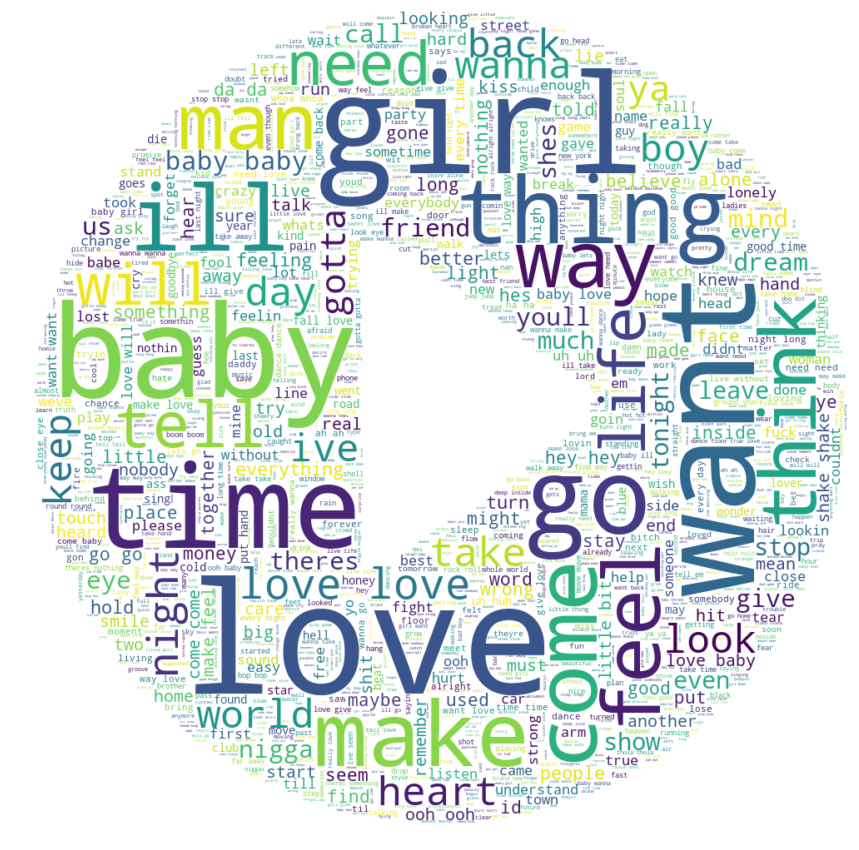

In [23]:
plt.figure(figsize=(15,15))
plt.imshow( wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [24]:
# 2차 제거할 단어
st_words1={'youll', 'ya','theres','will','theres','youll','will'}

In [25]:
for n in st_words1:
    stopwords.add(n)

In [ ]:
wc=WordCloud(background_color='white', 
          max_words=2000, 
          mask=mask, 
          stopwords=stopwords).generate(lyrics)

In [ ]:
plt.figure(figsize=(15,15))
plt.imshow( wc, interpolation='bilinear')
plt.axis('off')
plt.show()

##  1번의 결론
- 역시 love이 가장 많이 언급
- 노래 전체에 사랑을 갈구하는 듯한 표현이 많다
- 여성화자 보다는 남성화자가 많다
- nigga의 언급수가 생각보다 많다 => hiphop, rap이 짧은 시간내에 주류가 되었을 가능성이 높다 (대략 힙합은 70년대 중반부터 시작)

## 2.words per a song

In [ ]:
import seaborn as sns

In [ ]:
rawdata.head()

In [ ]:
import os  
import sys  

In [ ]:
# 빈 가사창 제거
rawdata_dup=rawdata.dropna(axis=0)

In [ ]:
del rawdata_dup['Source']

In [ ]:
# 워드 카운트 수행 위해 가사를 하나의 문자열로 만들어주기
lyrics=[lyric for lyric in rawdata_dup['Lyrics']]

In [ ]:
word_counts_total=[]  
for word in lyrics:
    word_count=0;
    word_count += len(word.split(" "))
    word_counts_total.append(word_count)
word_counts_total[:10]

In [ ]:
rawdata_dup['Word Count']=word_counts_total

In [ ]:
nanidx=rawdata_dup[rawdata_dup['Word Count']<10].index
if nanidx.any():
    rawdata_dup=rawdata_dup.drop(nanidx, inplace=False)

In [ ]:
rawdata_dup.head(10)

In [ ]:
sns.set_style('white')
sns.lmplot( x='Year', y='Word Count', data=rawdata_dup, size=12)
plt.show()

# 2번 결론
- 노래당 단어 수가 늘어나는 추세를 보임
- 노래의 템포가 빨라지거나
- 정해진 시간안에 보다 많은 단어를 내뱉는다(꼭은 아니지만 랩, 힙합의 가능성이 농후함)

## 3. 가장 많이 차트에 이름을 올린 아티스트 순위
- 마이클잭슨?
- 휘트니휴스턴?
- 비틀즈?
- 테일러스위프트?

In [ ]:
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline

In [ ]:
songs_artists=rawdata_dup['Artist'].value_counts(ascending=True)
songs_artists[-20:]

In [ ]:
plt.figure()
songs_artists[-25:].plot(kind='barh',figsize=(10,10), width=0.8, fontsize=20)
plt.xlabel('the number of songs in the chart', fontsize=30)
plt.title('Top 25 Musician on Record', fontsize=40)
plt.show()

## 3. 결과
1. 마도나, 엘튼존, 머라이어 캐리, 마이클 잭슨 순서
2. 연말 투표이기 때문에 매 순간을 포착할 수 없지만 유의미함

In [ ]:
rawdata_dup['Artist'].value_counts(ascending=False)

In [ ]:
x=rawdata_dup['Year'].unique()
y=rawdata_dup['Artist'].value_counts(ascending=False)[:20].index
plt.figure()
plt.plot(x,y)
plt.show()

In [ ]:
rawdata_dup['Year'].unique()[1]

In [ ]:
x

In [ ]:
driver.close()
driver.quit()

In [ ]:
import sys
sys.exit